In [184]:
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from symphony_data import Dataset, Metadata
from scipy.signal import decimate

In [188]:
str_datafile = '/Users/srinidhienaidu/Desktop/Rieke Lab Data/20230322C_kilosort2_data000_data001_data002_data003_data004__dimflash.p'

with open(str_datafile, "rb") as f:
   d_data = pickle.load(f)


In [186]:
d_data.keys()

dict_keys(['params', 'unique_params', 'spike_dict', 'cluster_id', 'pre_pts', 'stim_pts', 'tail_pts', 'bin_rate', 'isi', 'acf', 'isi_bin_edges'])

In [191]:
unique_params = d_data['unique_params']
spike_dict = d_data['spike_dict']
cluster_id = list(spike_dict.keys())
print(len(cluster_id))

u_intensity = np.array(unique_params['spotIntensity'])
intensities = d_data['params']['spotIntensity']
cluster_plot = spike_dict[cluster_id[0]]

# print(unique_params)


859


In [181]:
# Making a PSTH 
psth = np.zeros((len(cluster_id),len(u_intensity),cluster_plot.shape[1]))
count=0
for key, value in spike_dict.items():
    for i_count, intensity in enumerate(u_intensity):
        idx = np.argwhere(intensities == intensity).ravel()
        psth[count,i_count,:] = np.nanmean(value[idx,:],axis=0)
    count += 1

In [190]:
u_intensity.size
print(len(cluster_id))

859


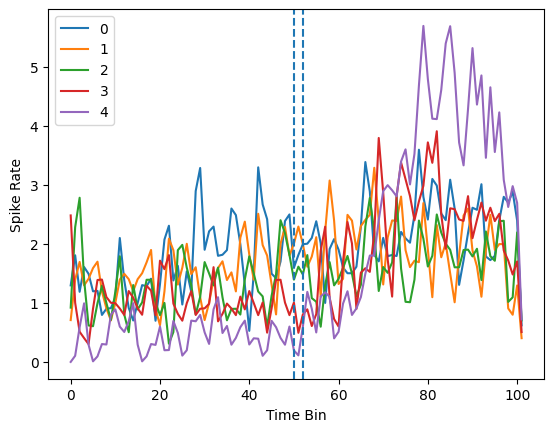

In [183]:
plt.xlabel("Time Bin")
plt.ylabel("Spike Rate")
for u_int in range(u_intensity.size):
    plt.plot(psth[230, u_int, :], label = u_int);

plt.axvline(50, ls = '--')
plt.axvline(52, ls = '--')
plt.legend()

In [156]:
import celltype_io as ctio 
str_classification = '/Volumes/Extreme SSD/kilosort2.classification.txt'
c_types = ctio.CellTypes(str_classification)


FileNotFoundError: /Volumes/Extreme SSD/kilosort2.classification.txt not found.

In [142]:
c_types.print_summary(b_only_main_types=False)

Total number of cells: 879
Number of All/Off/: 11
Number of All/OffMystery/: 3
Number of All/OffMystery/Off/: 16
Number of All/OffMystery/nc10/: 3
Number of All/OnMystery/: 38
Number of All/OnMystery/nc14/: 15
Number of All/OnMystery/nc15/: 9
Number of All/OnMystery/nc16/: 3
Number of All/OnMystery/nc20/: 34
Number of All/OnMystery/nc26/: 4
Number of All/OnMystery/nc7/: 3
Number of All/amacrine/: 14
Number of All/amacrine/nc17/: 3
Number of All/amacrine/nc24/: 5
Number of All/amacrine/nc25/: 23
Number of All/bad/: 7
Number of All/bad/nc1/: 27
Number of All/bad/nc11/: 19
Number of All/bad/nc3/: 1
Number of All/bad/nc3/nc4/: 13
Number of All/bad/nc3/nc5/nc10/: 11
Number of All/bad/nc3/nc5/nc8/: 11
Number of All/bad/nc3/nc5/nc9/: 29
Number of All/bad/nc3/nc7/: 11
Number of All/contaminated/: 8
Number of All/lowSNR/: 38
Number of All/lowSNR/nc12/: 2
Number of All/lowSNR/nc13/: 7
Number of All/lowSNR/nc2/: 11
Number of All/lowSNR/nc3/: 22
Number of All/lowSNR/nc4/: 15
Number of All/lowSNR/n

In [143]:
def get_arr_psth(str_type, idx_unique_o):
    ls_cellids = c_types.get_cellids(str_type)
    idx_cellids = ctio.map_ids_to_idx(ls_cellids, output.d_data['cluster_id'].squeeze())

    # Remove -1 from idx_OnP
    ls_cellids = ls_cellids[idx_cellids!=-1]
    idx_cellids = idx_cellids[idx_cellids!=-1]

    arr_psth = output.d_data['avg_psth'][idx_cellids, :,idx_unique_o, :].squeeze()
    
    # Normalize
    arr_psth = np.divide(arr_psth, np.max(arr_psth, axis=1)[:, np.newaxis])
    arr_psth = np.nan_to_num(arr_psth)
    print(f'number of cells: {arr_psth.shape[0]}, number of time bins: {arr_psth.shape[1]}')

    return arr_psth, ls_cellids, idx_cellids

In [146]:
idx_unique_o = 0
get_arr_psth('OnP', idx_unique_o)

NameError: name 'output' is not defined